http://aidiary.hatenablog.com/entry/20160328/1459174455

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger

import matplotlib.pyplot as plt

In [4]:
batch_size = 128
num_classes = 10
epochs = 20

# load mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


11493376/11490434 [==============================] - 44s 4us/step
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [5]:
# build model
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [6]:
# fit model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 33s 616us/step - loss: 0.2600 - acc: 0.9198 - val_loss: 0.1038 - val_acc: 0.9687
Epoch 2/20
54000/54000 [==============================] - 32s 602us/step - loss: 0.1072 - acc: 0.9669 - val_loss: 0.0703 - val_acc: 0.9778
Epoch 3/20
54000/54000 [==============================] - 31s 572us/step - loss: 0.0790 - acc: 0.9756 - val_loss: 0.0750 - val_acc: 0.9798
Epoch 4/20
54000/54000 [==============================] - 30s 564us/step - loss: 0.0619 - acc: 0.9814 - val_loss: 0.0750 - val_acc: 0.9805


In [7]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

test loss: 0.07554923261390795
test acc: 0.9794


In [8]:
# plot results
loss = hist.history['loss']
val_loss = hist.history['val_loss']

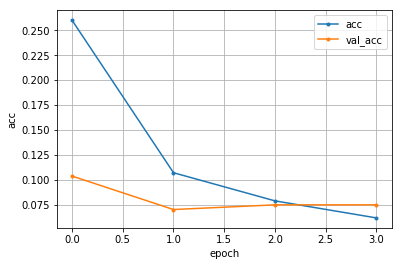

In [9]:
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()